### **Análisis Exploratorio de Datos:** 
---
#### **Para este proceso se tendrá en cuenta el KPI establecido para actuar en base a ello y obtener visualizaciones claves y relevantes para el objetivo**.
#### **Se utilizarán las tablas de la base de datos ``telecomunicaciones`` creada previamente en PostgreSQL.**

- ##### **KPI: Incremento del 5% en acceso a líneas pospago para cada provincia en el próximo trimestre.**

---

#### **Objetivo:**
#### El objetivo principal de este análisis es evaluar el acceso a líneas pospago en cada provincia de Argentina y proyectar un incremento del 5% para el próximo trimestre. 
#### El KPI está enfocado en identificar las provincias con menor acceso a líneas pospago y proponer acciones para aumentar su penetración, con la meta de mejorar la accesibilidad a estos servicios.

#### **Contexto:**
#### En el sector de telecomunicaciones, las líneas pospago juegan un rol clave en la estabilidad del negocio, ya que representan una fuente de ingresos recurrentes para las operadoras. Este análisis se orienta a incrementar la cantidad de líneas pospago en un 5% durante el próximo trimestre, tomando como base los datos de accesos históricos por provincia.

#### El acceso a líneas pospago es especialmente relevante en provincias con menor conectividad, ya que puede contribuir a una mejor experiencia del usuario y al crecimiento económico en dichas regiones.

#### **Metodología**:
- #### Extracción de Datos:

##### Se obtendrán los datos de accesos a líneas pospago desde la base de datos creada en PostgreSQL, utilizando la tabla ``accesos_telefonia_movil``
##### Los datos se agruparán por períodos (Año y Trimestre) para observar la tendencia de accesos a lo largo del tiempo.
- #### Cálculo del KPI:

    - ##### **KPI = ((Acceso Pospago Nuevo - Acceso Pospago Actual) / Acceso Pospago Actual) * 100**
- #### Visualizaciones:

##### Se realizarán gráficos para comparar la evolución de accesos por provincia y visualizar el incremento proyectado.

---

### Importación de librerías necesarias para el proceso de Análisis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Conexión a la Base de Datos y Extracción de Datos

##### Se etrae información de la base de datos telecomunicaciones relacionada con el acceso a telefonia movil en planes pospago.

### Consulta SQL:
##### Se realizó una consulta SQL para obtener el total de accesos históricos de planes pospago y prepago en telefonia movil agrupados por año y trimestre.

In [19]:
# Conexión a la base de datos
conn = psycopg2.connect(
    host="localhost",
    database="telecomunicaciones",
    user="USER",
    password="PSSW"
)


# Consulta SQL para obtener los accesos pospago por trimestre y año
query = ("""
         
SELECT 
	pe.anio,
	pe.trimestre,
	atm.total_accesos_pospago,
    atm.total_accesos_prepago
FROM 
	accesos_telefonia_movil atm
JOIN
	periodos pe ON atm.id_periodo = pe.id_periodo
ORDER BY 
	pe.anio, pe.trimestre;

""")


# Se ejecuta la consulta y se cargan los resultados en un df
df_telefonia = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Visualizar el DataFrame
df_telefonia.head()


,anio,trimestre,total_accesos_pospago,total_accesos_prepago
0,2013,1,7761349.0,57147608.0
1,2013,2,7769110.0,58004822.0
2,2013,3,8002183.0,59048909.0
3,2013,4,8674516.0,58894516.0
4,2014,1,8224482.0,54725089.0


#### **DISTRIBUCIÓN DE LA EVOLUCIÓN TRIMESTRAL DEL ACCESO A LÍNEAS POSPAGO (2023 en adelante)**

##### Este gráfico de barras muestra la evolución trimestral en el número de accesos a líneas pospago en Argentina, desde el primer trimestre de 2023 hasta el segundo trimestre de 2024 (último registro oficial). El gráfico permite visualizar de manera clara cómo ha ido cambiando el total de líneas pospago a lo largo de los últimos trimestres.
##### **Observaciones Clave:**
- ##### ***Incremento sostenido:*** A lo largo de los trimestres, se observa un aumento constante en el número de accesos a líneas pospago. El valor más bajo se encuentra en el primer trimestre de 2023, con aproximadamente 7 millones de accesos, mientras que el valor más alto está en el primer trimestre de 2024, con más de 8 millones de accesos.
- ##### ***Crecimiento estable:*** No se observan grandes saltos ni caídas en el número de accesos pospago, lo que sugiere un crecimiento estable en la adopción de este tipo de líneas.
- ##### ***Tendencia a seguir creciendo:*** La tendencia al alza en los trimestres anteriores sugiere que es viable proyectar un aumento en el acceso a líneas pospago para el siguiente trimestre, lo cual refuerza la factibilidad del KPI que proyecta un incremento del 5% para el próximo trimestre.
##### **Impacto en la toma de decisiones:**
##### Este gráfico muestra una tendencia clara y positiva en el uso de líneas pospago. Para alcanzar el KPI establecido de un 5% de aumento en el próximo trimestre, será crucial mantener esta tendencia e implementar acciones que incentiven aún más la adopción de este tipo de líneas.

##### **Conclusión:**
##### La evolución mostrada indica que hay una base sólida sobre la cual proyectar un crecimiento adicional en el acceso a líneas pospago. Sin embargo, las acciones deberán centrarse en mantener este ritmo de crecimiento, mediante incentivos, promociones, o mejoras en el servicio que hagan de las líneas pospago una opción más atractiva para los usuarios.



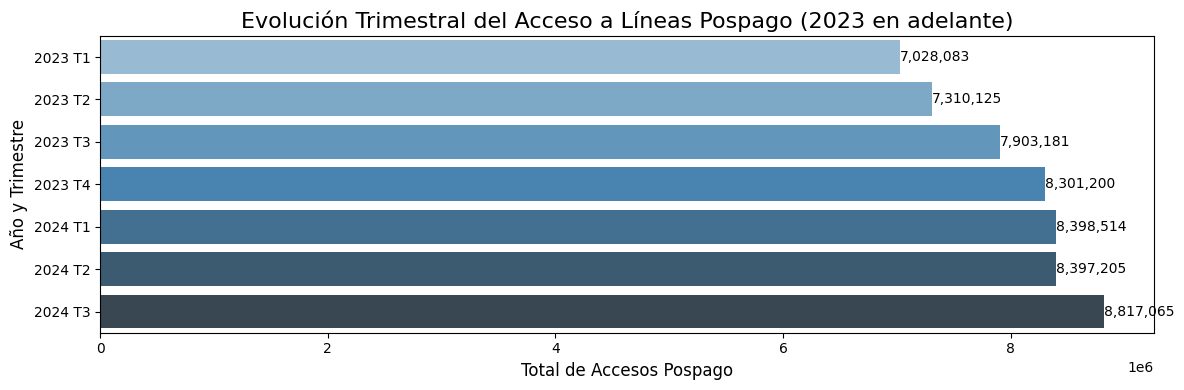

In [94]:
# Filtro desde 2023 para obtener la representación más reciente
df_pospago_reciente = df_telefonia[df_telefonia['anio'] >= 2023]

# Columna 'anio_trimestre' combinando 'anio' y 'trimestre'
df_pospago_reciente['anio_trimestre'] = df_pospago_reciente['anio'].astype(str) + ' T' + df_pospago_reciente['trimestre'].astype(str)

# Figura y ejes
plt.figure(figsize=(12, 4))

# Gráfico de barras
barplot = sns.barplot(y='anio_trimestre', x='total_accesos_pospago', data=df_pospago_reciente, palette='Blues_d')

# Título y etiquetas
plt.title('Evolución Trimestral del Acceso a Líneas Pospago (2023 en adelante)', fontsize=16)
plt.xlabel('Total de Accesos Pospago', fontsize=12)
plt.ylabel('Año y Trimestre', fontsize=12)

# Añadir los números de accesos en cada barra
for index, value in enumerate(df_pospago_reciente['total_accesos_pospago']):
    plt.text(value, index, f'{value:,.0f}', color='black', va="center")

# Rotación de etiquetas del eje X
plt.xticks(rotation=0)

# Visualización
plt.tight_layout()
plt.show()


#### **PROYECCIÓN DE UN AUMENTO DEL 5% EN LOS ACCESOS DE PLANES POSTPAGOS PARA EL TERCER TRIMESTRE 2024**

##### Este gráfico de líneas refleja tanto los accesos históricos a líneas pospago como la proyección del 5% de aumento para el tercer trimestre de 2024. Nos permite visualizar de manera clara cómo ha ido evolucionando el uso de líneas pospago y cómo podría continuar aumentando, basándonos en la proyección del KPI.

##### **Observaciones Clave:**
- ##### ***Crecimiento constante:*** Desde el primer trimestre de 2023, el acceso a líneas pospago ha mostrado un crecimiento estable.
- ##### ***Proyección positiva:*** El aumento proyectado del 5% para el tercer trimestre de 2024 lleva el número de accesos a un total de 8,817,065, lo que significa un incremento significativo sobre el trimestre anterior que tuvo accesos de 8,397,205.
##### **Impacto en la Toma de Decisiones:**
##### Este análisis nos muestra que, aunque se ha alcanzado una gran cantidad de usuarios de planes pospago, la proyección sugiere que aún hay margen para continuar aumentando la penetración de este tipo de líneas. Las estrategias para alcanzar este objetivo podrían incluir incentivos adicionales, promociones en los planes pospago o mejoras en el servicio.

##### **Conclusión:**
##### La proyección del 5% es un objetivo realista, aunque será necesario implementar iniciativas que aseguren la tendencia ascendente. Mantener la calidad del servicio y la competitividad de los planes pospago serán clave para asegurar el éxito de este KPI.

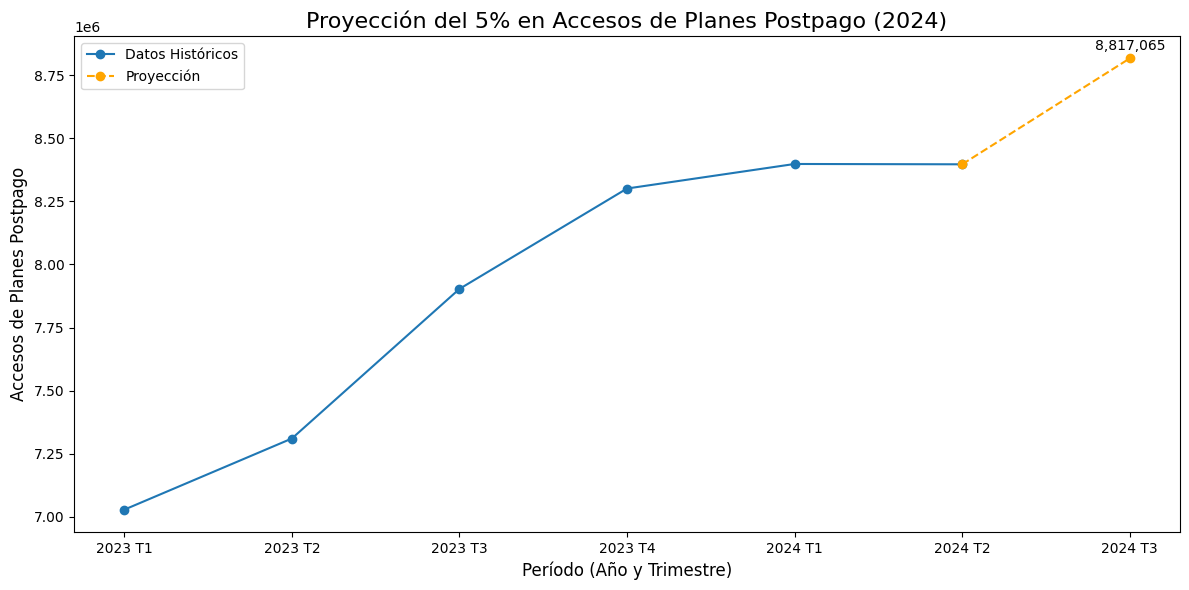

In [87]:
# Datos históricos a partir del primer trimestre 2023
trimestres = ['2023 T1', '2023 T2', '2023 T3', '2023 T4', '2024 T1', '2024 T2']
accesos_postpago = [7028083.00, 7310125.00, 7903181.00, 8301200.00, 8398514.00, 8397205.00]  # Datos oficiales

# KPI: Proyección del tercer trimestre (aumento del 5%)
proyeccion_t3_2024 = 8397205.00 * 1.05

# Se agrega el trimestre proyectado a la lista
trimestres.append('2024 T3')
accesos_postpago.append(proyeccion_t3_2024)

# Crear la figura y el gráfico de líneas
plt.figure(figsize=(12, 6))

# Línea para los datos históricos
plt.plot(trimestres[:-1], accesos_postpago[:-1], marker='o', label='Datos Históricos')

# Línea para la proyección
plt.plot(trimestres[-2:], accesos_postpago[-2:], marker='o', linestyle='--', color='orange', label='Proyección')

# Valor de la proyección
plt.annotate(f'{proyeccion_t3_2024:,.0f}', xy=('2024 T3', proyeccion_t3_2024), xytext=(-25, 6), textcoords='offset points')


# Título y etiquetas
plt.title('Proyección del 5% en Accesos de Planes Postpago (2024)', fontsize=16)
plt.xlabel('Período (Año y Trimestre)', fontsize=12)
plt.ylabel('Accesos de Planes Postpago', fontsize=12)
plt.legend()

# Visualización
plt.tight_layout()
plt.show()


#### **DISTRIBUCIÓN DE ACCESOS POSPAGO Y PREPAGO (2024 T1 y T2)**
##### Este gráfico de torta muestra la distribución de los accesos a líneas pospago y prepago durante el primer y segundo trimestre de 2024. Permite visualizar de manera clara el predominio de los accesos a líneas prepago frente a los pospago en el mercado actual de telecomunicaciones.
##### **Observaciones Clave:**
- ##### ***Dominio de líneas prepago:*** El 81% de los accesos corresponde a líneas prepago, lo que refleja una tendencia marcada en el uso de este tipo de plan entre los consumidores.
- ##### ***Menor adopción de líneas pospago:*** Las líneas pospago representan solo el 19% del total de accesos. Esto destaca una oportunidad significativa para incrementar la adopción de este tipo de líneas a través de estrategias como mejoras en los beneficios asociados a planes pospago, mayor flexibilidad en las tarifas y promociones orientadas a usuarios de prepago.
##### **Impacto en la toma de decisiones:**
##### Esta visualización subraya el reto que representa aumentar en un 5% el acceso a líneas pospago, dado que los planes prepago aún son significativamente más populares. Sin embargo, muestra también una gran oportunidad de mercado para que las empresas de telecomunicaciones busquen captar a esos usuarios prepago, posiblemente mediante ofertas de fidelización o planes más accesibles en el segmento pospago.
##### **Conclusión:**
##### La distribución actual refleja una diferencia considerable en la preferencia de los usuarios entre planes pospago y prepago, lo que implica que cualquier esfuerzo de crecimiento en el segmento pospago debe estar respaldado por estrategias bien planificadas que incluyan incentivos claros para los usuarios actuales de prepago. Aun así, el KPI de un 5% de aumento en líneas pospago es alcanzable y puede representar un paso importante hacia la diversificación de los servicios móviles.

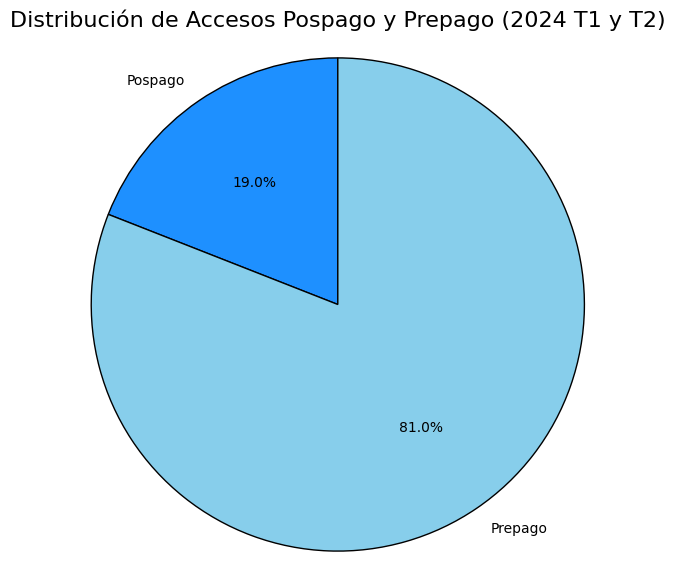

In [132]:
# Filtro para seleccionar solo los datos 2024
df_t2_2024 = df_telefonia[(df_telefonia['anio'] == 2024)]

# Accesos totales para pospago y prepago
accesos_pospago = df_t2_2024['total_accesos_pospago'].sum()
accesos_prepago = df_t2_2024['total_accesos_prepago'].sum()

# Gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie([accesos_pospago, accesos_prepago], labels=['Pospago', 'Prepago'], autopct='%1.1f%%', colors=['#1E90FF', '#87CEEB'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Accesos Pospago y Prepago (2024 T1 y T2)', fontsize=16)
plt.axis('equal')  # Para que el gráfico de torta sea un círculo perfecto
plt.show()


### **CONSIDERACIONES FINALES:**

#### A lo largo del análisis exploratorio de datos, se ha examinado la evolución trimestral, la proyección futura y la distribución actual entre los tipos de planes móviles (pospago y prepago) en Argentina. Este análisis ha permitido identificar puntos clave para tomar decisiones estratégicas sobre cómo lograr el aumento del 5% en los accesos a líneas pospago durante el próximo trimestre.

#### **Tendencias y Proyecciones:**
- #### **Evolución estable:** A lo largo de los trimestres, se observa un crecimiento constante en la adopción de planes pospago. Esto sugiere que existe una tendencia positiva, y el objetivo de un aumento del 5% en el próximo trimestre es factible si se mantienen los esfuerzos actuales.
- #### **Proyección viable:** La proyección realizada para el tercer trimestre de 2024 muestra que el objetivo de aumentar los accesos pospago es alcanzable, con una proyección de 8.8 millones de accesos. Sin embargo, se requerirá de acciones concretas para asegurar que este incremento se materialice.

#### **Distribución de Accesos:**
- #### **Predominio de prepago:** El análisis de la distribución entre líneas pospago y prepago revela que el 81% de los usuarios todavía prefiere los planes prepago. Esto representa un desafío considerable para las empresas de telecomunicaciones, que deberán encontrar formas de hacer más atractivas las ofertas de planes pospago.
- #### **Oportunidad de mercado:** La amplia diferencia en la adopción de planes prepago frente a pospago representa una oportunidad significativa para las empresas. Aumentar la cuota de mercado de los planes pospago requerirá estrategias como ofertas personalizadas, programas de fidelización o tarifas más flexibles.
#### **Posibles Estrategias:**
- #### **Incentivos y campañas:** Para lograr un aumento del 5% en los accesos pospago, lo crucial es implementar incentivos que hagan de estos planes una opción más atractiva frente a los prepago. Esto podría incluir mayores beneficios por el uso continuo, mejoras en el acceso a servicios adicionales o descuentos promocionales.
- #### **Estrategia diferenciada:** Dado el gran predominio de las líneas prepago, las campañas dirigidas a convertir a usuarios prepago en pospago deben estar focalizadas en los segmentos más interesados en la estabilidad y los beneficios a largo plazo que ofrecen los planes pospago.
